In [11]:
'''
    author : mirza_inayat
    title  : Covid-19 Death Predictor using Straight line fitting and quadratic line fitting
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime as dt

In [18]:
data = pd.read_csv('india_covid19_may2020.csv',sep = r'\s*,\s*', header=0, encoding='ascii', engine='python')
data

,Date,Deaths
0,01-05-2020,73
1,02-05-2020,71
2,03-05-2020,83
3,04-05-2020,72
4,05-05-2020,195
5,06-05-2020,126
6,07-05-2020,89
7,08-05-2020,103
8,09-05-2020,95
9,10-05-2020,128


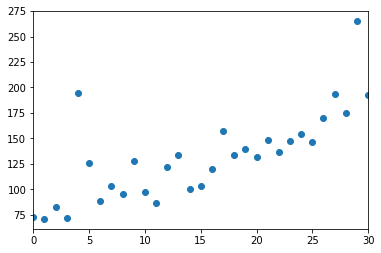

In [25]:
data['Deaths'].plot(marker='o', ls='');

28.305592074074195
0.5648048258901621


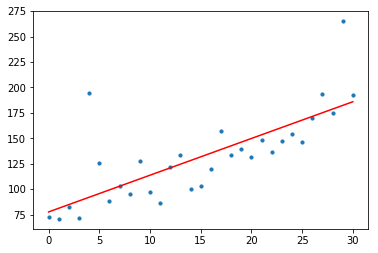

Prediction for 20 April :  [41.80443548]
Prediction for 10 June :  [222.06653226]


In [46]:
#X = data[['Date']]
X = (data.index -  data.index[0]).values.reshape(-1, 1)
#Y = np.asarray(data['Deaths']).reshape(-1, 1)
Y = data['Deaths'].values
model1 = LinearRegression()  
model1.fit(X, Y)  # perform linear regression
Y_pred = model1.predict(X)  # make predictions

rmse = np.sqrt(mean_squared_error(Y,Y_pred))
r2 = r2_score(Y,Y_pred)
print(rmse)
print(r2)

plt.scatter(X, Y, s=10)
plt.plot(X, Y_pred, color='r')
plt.show()

#Predicting for 20 April and 10 June
x1 = -10  # 1May - 10 = 0 - 10 = -10
x2 =  40  # 31May + 10 = 30 + 10 = 40
test_X1 = np.array(x1).reshape(-1, 1)
test_X2 = np.array(x2).reshape(-1, 1)

y1_pred = model1.predict(test_X1)
y2_pred = model1.predict(test_X2)
print 'Prediction for 20 April : ', y1_pred
print "Prediction for 10 June : ", y2_pred

26.53745523146897
0.6174764894711743


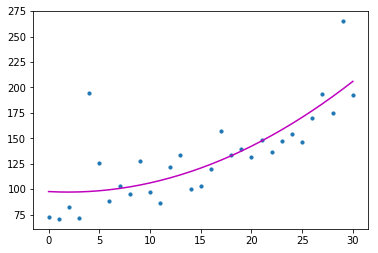

Prediction for 20 April :  [116.92518202]
Prediction for 10 June :  [297.18727879]


In [49]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_quad = polynomial_features.fit_transform(X)

model2 = LinearRegression()
model2.fit(x_quad, Y)
y_quad_pred = model2.predict(x_quad)

rmse = np.sqrt(mean_squared_error(Y,y_quad_pred))
r2 = r2_score(Y,y_quad_pred)
print(rmse)
print(r2)

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_quad_pred), key=sort_axis)
X, y_quad_pred = zip(*sorted_zip)
plt.plot(X, y_quad_pred, color='m')
plt.show()

#Again Same
#Predicting for 20 April and 10 June
x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)

tst_X1 = polynomial_features.fit_transform(x1)
tst_X2 = polynomial_features.fit_transform(x2)

y1_qpred = model2.predict(tst_X1)
y2_qpred = model2.predict(tst_X2)
print "Prediction for 20 April : ", y1_qpred
print "Prediction for 10 June : ", y2_qpred